In [124]:
from riken.rnn.rnn_keras_with_psiblast import *
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from riken.viz_utils import visualize_attention, to_2d_array, visualize_attention_2d
from riken.protein_io.prot_features import idx_to_char
from keras.models import Model
from riken.word2vec.classification_tools import roc_score

from tqdm import tqdm


RANDOM_STATE = 42
MAXLEN = 500
DATA_PATH = "/home/pierre/riken/data/riken_data/complete_from_xlsx_v2COMPLETE.tsv"
KEY_TO_PREDICT = "is_allergenic"
LOG_DIR = "/home/pierre/riken/riken/rnn/logs/riken_data_psiblast/logs_riken_data_psiblast_1_transfer"
TRANSFER_PATH = None
SPLITTER = data_op.group_shuffle_indices
PSSM_FORMAT_FILE = "/home/pierre/riken/data/psiblast/riken_data_v2/{}_pssm.txt"

In [4]:
df = pd.read_csv(DATA_PATH, sep='\t', index_col=0).dropna()
df = df.loc[df.seq_len >= 50, :]

sequences, y = df['sequences'].values, df[KEY_TO_PREDICT]
y = pd.get_dummies(y).values
X = pad_sequences([[prot_features.safe_char_to_idx(char) for char in sequence]
                   for sequence in sequences], maxlen=MAXLEN)
indices = df.index.values

# Get train test indices before getting all features (potentially less
# FOR CONSISTENCY PURPOSES

# groups = None if GROUPS is None else df[GROUPS].values
# train_inds, test_inds = SPLITTER(sequences, y, groups)

train_inds, test_inds = np.where(df.is_train)[0], np.where(df.is_train==False)[0]

X, pssm, y = get_all_features(X, y, indices, pssm_format_fi=PSSM_FORMAT_FILE)

def convert_indices(old_to_new_dic, indices):
    res_ind = []
    for ind in indices:
        if ind in old_to_new_dic:
            res_ind.append(old_to_new_dic[ind])
    return np.array(res_ind)

print(np.intersect1d(train_inds, test_inds))
assert len(np.intersect1d(train_inds, test_inds)) == 0
print(train_inds.shape, test_inds.shape)
Xtrain, Xtest, ytrain, ytest = X[train_inds], X[test_inds], y[train_inds], y[test_inds]
pssm_train, pssm_test = pssm[train_inds], pssm[test_inds]

print(pssm_train[0])
print(pssm_test[0])

  0%|          | 0/12285 [00:00<?, ?it/s]/home/pierre/riken/riken/protein_io/reader.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pssm_df = pd.read_csv(path_to_pssm, sep=' ', skiprows=2, skipfooter=6, skipinitialspace=True) \
  3%|▎         | 371/12285 [00:06<03:17, 60.42it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baa04558.1_pssm.txt'
Error!


  4%|▍         | 540/12285 [00:08<03:10, 61.56it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09885.1_pssm.txt'
Error!


  5%|▍         | 561/12285 [00:09<03:10, 61.64it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/cab39376.1_pssm.txt'
Error!


  5%|▌         | 633/12285 [00:10<03:08, 61.78it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09886.2_pssm.txt'
Error!


  6%|▋         | 774/12285 [00:12<03:06, 61.86it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09887.4_pssm.txt'
Error!


  7%|▋         | 802/12285 [00:12<03:05, 61.80it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aam55492.1_pssm.txt'
Error!


  8%|▊         | 936/12285 [00:15<03:03, 61.70it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aap94213.1_pssm.txt'
Error!


  9%|▉         | 1124/12285 [00:18<02:59, 62.08it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/cai64398.1_pssm.txt'
Error!


 10%|█         | 1284/12285 [00:20<02:58, 61.76it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/abl77410.1_pssm.txt'
Error!


 12%|█▏        | 1434/12285 [00:23<02:54, 62.21it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/acb46292.1_pssm.txt'
Error!


 12%|█▏        | 1483/12285 [00:23<02:53, 62.20it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/car82266.1_pssm.txt'
Error!


 13%|█▎        | 1550/12285 [00:24<02:52, 62.36it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/act37324.1_pssm.txt'
Error!


 13%|█▎        | 1573/12285 [00:25<02:51, 62.34it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/acz95445.1_pssm.txt'
Error!


 14%|█▍        | 1696/12285 [00:27<02:49, 62.58it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78221.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78222.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78223.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aee98392.1_pssm.txt'
Error!


 14%|█▍        | 1781/12285 [00:28<02:47, 62.81it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60026.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60027.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60028.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60029.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60030.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60031.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/ccu99206.1_pssm.txt'
Error!


 15%|█▌        | 1873/12285 [00:29<02:45, 62.93it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/akj77990.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/bat62430.1_pssm.txt'
Error!


 15%|█▌        | 1894/12285 [00:30<02:45, 62.79it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/4zce_a_pssm.txt'
Error!


100%|██████████| 12285/12285 [04:16<00:00, 47.93it/s]


(12285, 500)
(12285, 2)
(12285, 500, 42)
12285 examples
[]
(11061,) (1224,)
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 3.   -4.   -4.   ...  0.    1.62  0.36]
 [-2.   -1.   -2.   ... 15.    0.33  0.16]
 [-3.   -4.   -5.   ... 40.    0.85  0.28]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-1.   -2.    2.   ...  0.    0.55  0.14]
 [-2.   -1.    1.   ...  0.    0.98  0.23]
 [-2.   -2.   -3.   ...  0.    1.9   0.2 ]]


In [6]:
train_protein_names, test_protein_names = indices[train_inds], indices[test_inds]

In [7]:
from keras.models import load_model

mdl = load_model('logs/riken_data_psiblast/logs_riken_new_1_NO_transfer/weights.13-0.50.hdf5')
ypred = mdl.predict([Xtest, pssm_test])

test_df = df.iloc[test_inds]
test_df.loc[:, 'y_pred'] = ypred[:, 1]

/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f035c72e748>)

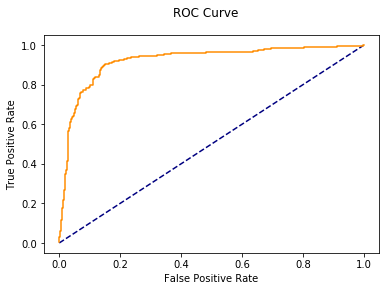

In [8]:
roc_auc_score(test_df.is_allergenic, test_df.y_pred)
roc_score(ytest[:, 1], ypred[:, 1])

In [9]:
attention = mdl.get_layer(name='activation_1').output
attention_model = Model(inputs=mdl.inputs, outputs=attention)

In [76]:
# seqs, pssms = Xtest, pssm_test
# atts = attention_model.predict([seqs, pssms])
# seqs_str = [[idx_to_char[idce] for idce in seq] for seq in seqs]
# ypred = mdl.predict([seqs, pssms])[:, 1]
# ytrue = ytest[:, 1]

seqs, pssms = X, pssm
atts = attention_model.predict([seqs, pssms])
seqs_str = [[idx_to_char[idce] for idce in seq] for seq in seqs]
ypred = mdl.predict([seqs, pssms])[:, 1]
ytrue = ytest[:, 1]

# Save all attention viz

In [8]:
import os
def save_attentions(attentions, characters, y_true, y_pred, protein_names, dire):
    for indice, name in enumerate(tqdm(protein_names)):
        seq = characters[indice]
        first_non_null = [ind for ind in range(len(seq)) if seq[ind]!=''][0]
        seq = seq[first_non_null:]
        att = atts[indice][first_non_null:]
        assert(len(att)==len(seq))
        fig = plt.figure()
        ax = visualize_attention_2d(seq, att, ncols=20)
        fig.suptitle('protein name: {name}; allergen: {is_allergen}; predicted score: {score}'
                .format(name=name, is_allergen=y_true[indice], score=y_pred[indice]))
        fig.savefig(os.path.join(dire, '{}_attention.png'.format(name)))
        plt.close()
        

In [10]:
save_attentions(atts, seqs_str, ytrue, ypred, test_protein_names, 'train_attentions')

100%|██████████| 1224/1224 [07:09<00:00,  2.85it/s]


# Experiments

## Quantitative approach

In [77]:
from riken.protein_io.reader import get_epitopes_masks, read_epitopes_data

epitopes_df = read_epitopes_data()
masks = get_epitopes_masks(df, epitopes_df)
masks_values = masks.loc[:, 'mask'].values
masks_values = pad_sequences(masks_values, maxlen=MAXLEN).astype(np.float32)

In [78]:
masks_values[masks_values <= 0.01] = 0.0

In [139]:
# atts_norm = (atts - atts.mean(axis=1).reshape((-1, 1))) / atts.std(axis=1).reshape((-1, 1))

df.loc[:, 'pos'] = np.arange(len(df))
att_positions = df.loc[masks.original_index, 'pos']
len_values = [len(elem) for elem in sequences[att_positions]]
seq_values = df.loc[masks.original_index, 'sequences']
atts_values = atts[att_positions]


for idx in range(len(atts_values)):
    # Norm
#     atts_values[idx] = (atts_values[idx] - atts_values[idx,-len_values[idx]:].mean()) \
#                             / atts_values[idx,-len_values[idx]:].std()
    
    # Norm on pertinent characters
    atts_values[idx] = atts_values[idx] / atts_values[idx,-len_values[idx]:].sum()

In [148]:
(atts_values*masks_values).mean()

0.0006914534

In [147]:
means = []
for _ in range(5000):
    random_policy = np.random.random(masks_values.shape)
#     random_policy = (random_policy - random_policy.mean(axis=1).reshape((-1, 1))) / random_policy.std(axis=1).reshape((-1, 1))
#     
    for idx in range(len(masks_values)):
    # Norm
    #     atts_values[idx] = (atts_values[idx] - atts_values[idx,-len_values[idx]:].mean()) \
    #                             / atts_values[idx,-len_values[idx]:].std()

        # Norm on pertinent characters
        random_policy[idx] = random_policy[idx] / random_policy[idx,-len_values[idx]:].sum()
    
means.append((masks_values*random_policy).mean())
    
    
print(np.mean(means))

0.0005674271373166562


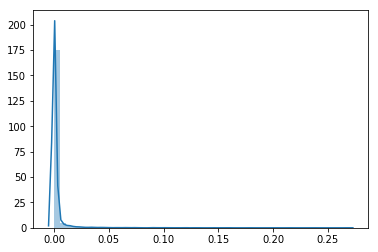

In [149]:
import seaborn as sns

sns.distplot(atts_values.reshape(-1))

In [135]:
def comparative_plot(seq, attention, mask):
    attention_zone = np.log(attention[-len(seq):])
    mask_zone = mask[-len(seq):]
    fig, axes = plt.subplots(ncols=2, figsize=(10, 6))
    plt.figure()
    visualize_attention_2d(seq, attention_zone, 20, ax=axes[0])    
    # IDEA 1
    visualize_attention_2d(seq, mask_zone, 20, ax=axes[1])
    plt.show()

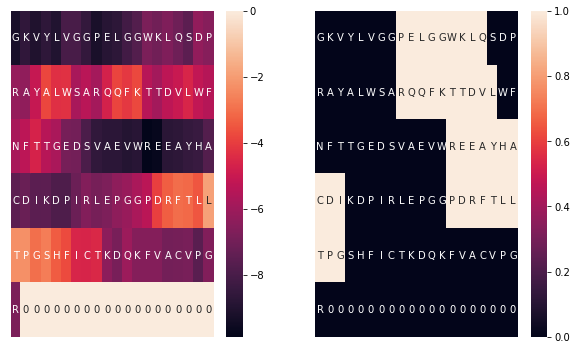

<Figure size 432x288 with 0 Axes>

In [136]:
comparative_plot(seq_values[0], atts_values[0], masks_values[0])

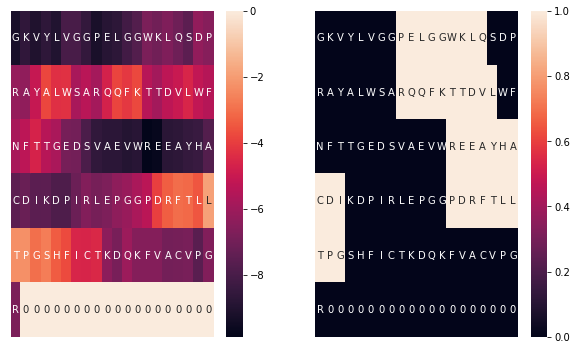

<Figure size 432x288 with 0 Axes>

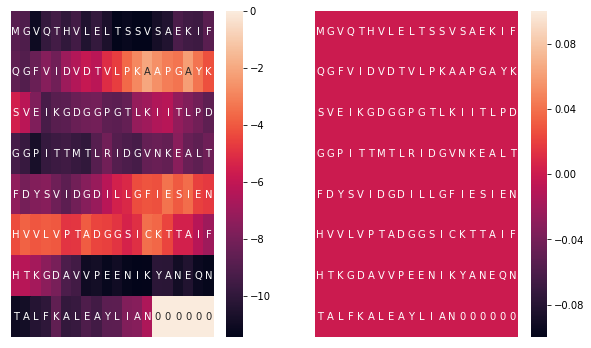

<Figure size 432x288 with 0 Axes>

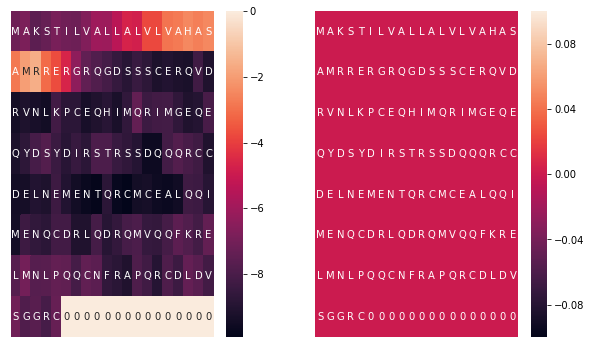

<Figure size 432x288 with 0 Axes>

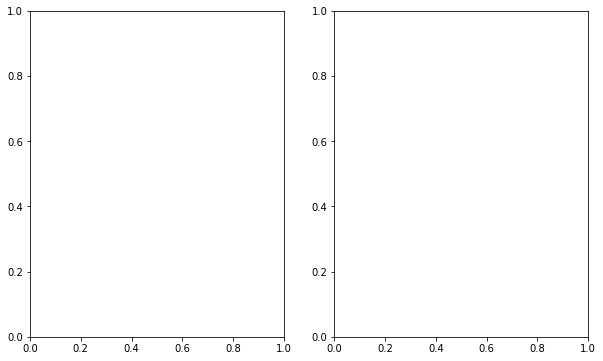

<Figure size 432x288 with 0 Axes>

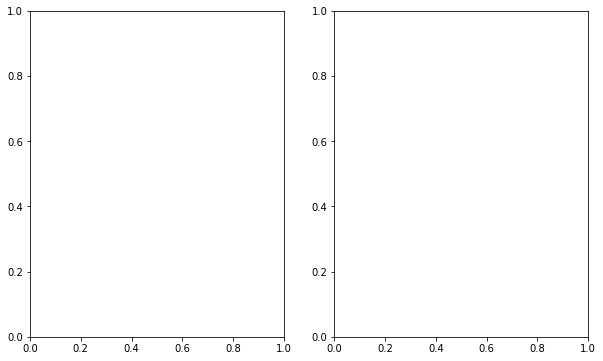

<Figure size 432x288 with 0 Axes>

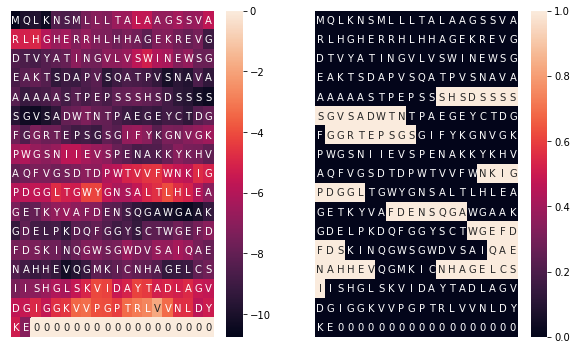

<Figure size 432x288 with 0 Axes>

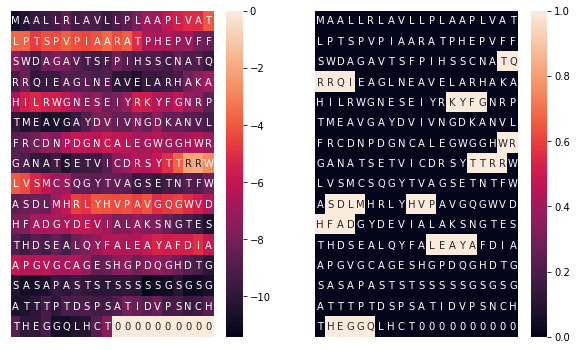

<Figure size 432x288 with 0 Axes>

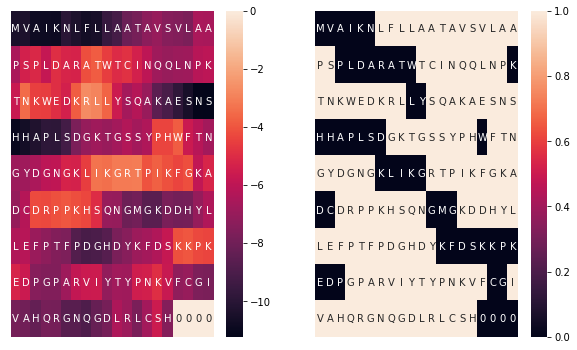

<Figure size 432x288 with 0 Axes>

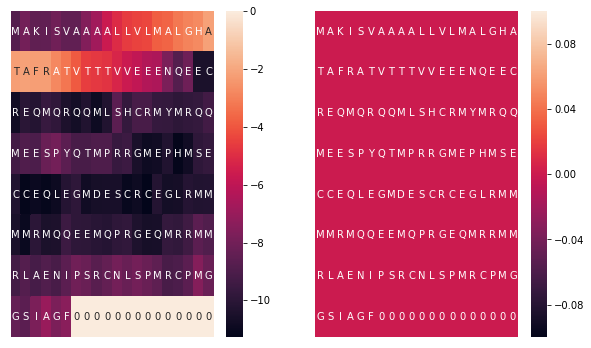

<Figure size 432x288 with 0 Axes>

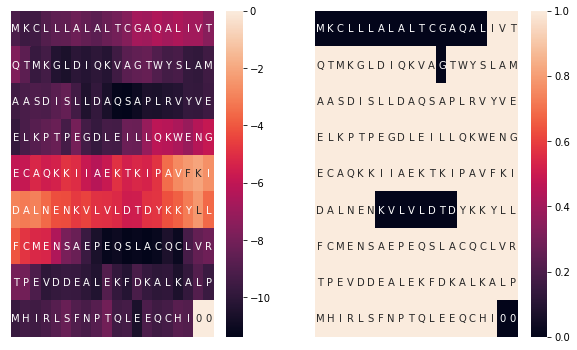

<Figure size 432x288 with 0 Axes>

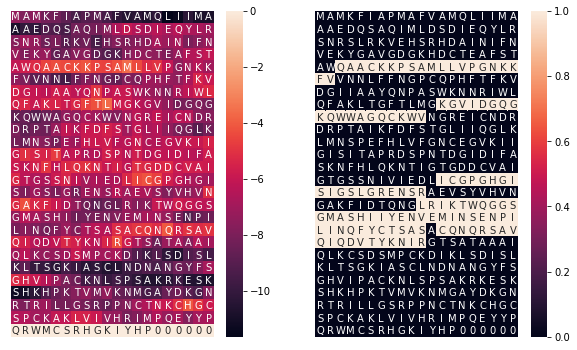

<Figure size 432x288 with 0 Axes>

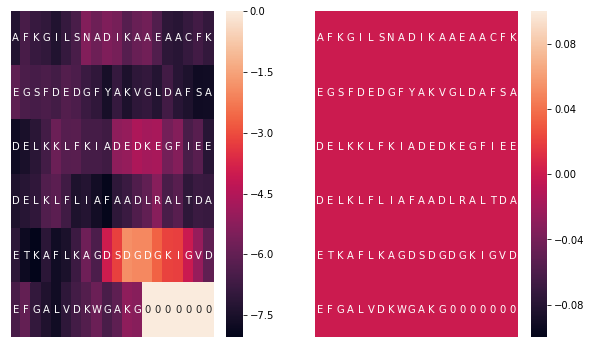

<Figure size 432x288 with 0 Axes>

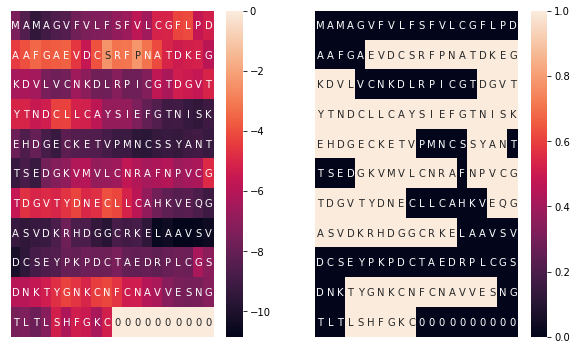

<Figure size 432x288 with 0 Axes>

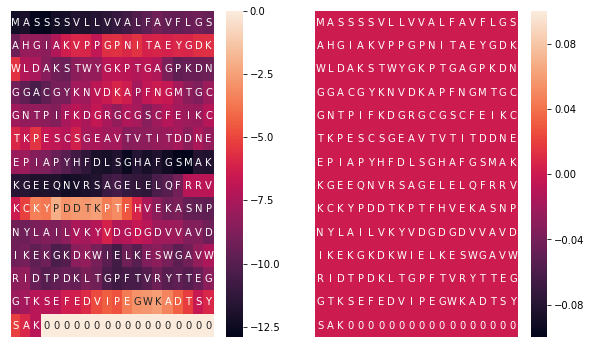

<Figure size 432x288 with 0 Axes>

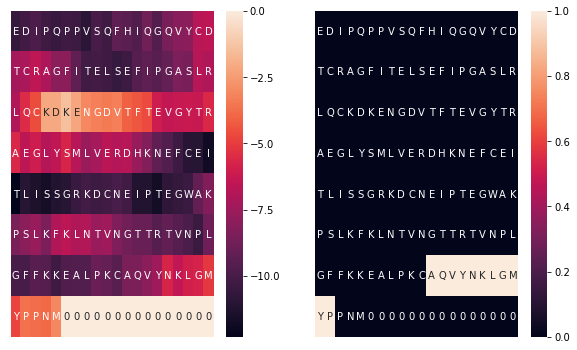

<Figure size 432x288 with 0 Axes>

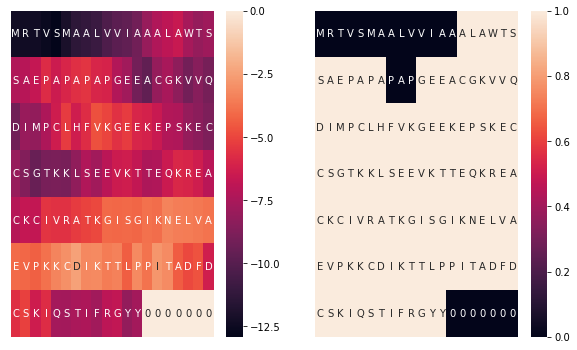

<Figure size 432x288 with 0 Axes>

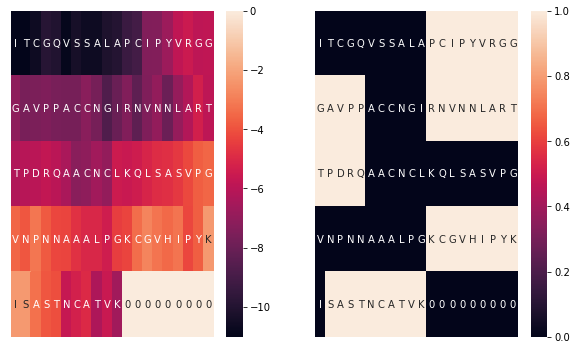

<Figure size 432x288 with 0 Axes>

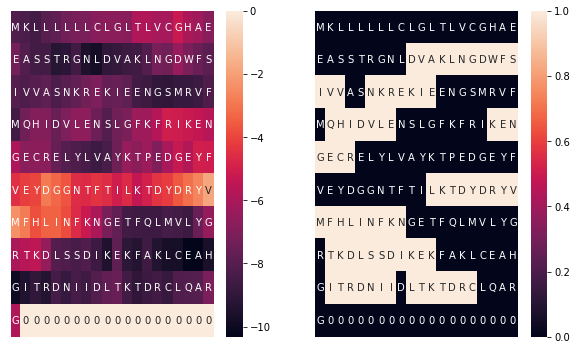

<Figure size 432x288 with 0 Axes>

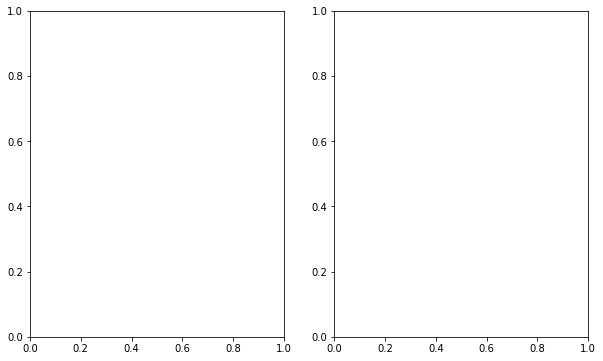

<Figure size 432x288 with 0 Axes>

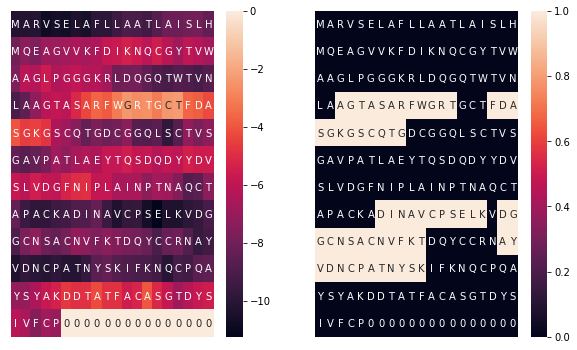

<Figure size 432x288 with 0 Axes>

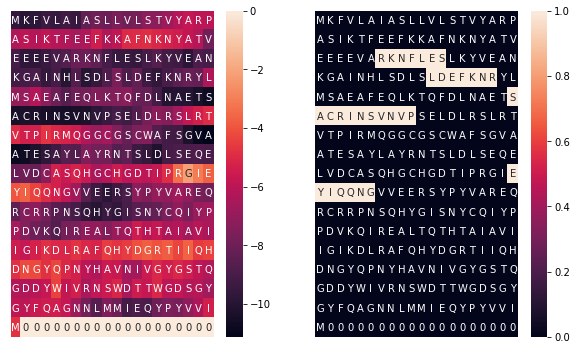

<Figure size 432x288 with 0 Axes>

In [138]:
for seq_v, att_v, mask_v in zip(seq_values, atts_values, masks_values):
    try:
        comparative_plot(seq_v, att_v, mask_v)
    except:
        pass

# Same with direct extractions of epitopes